In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
office_path = "../resources/the_office_series.csv"
lines_path = "../resources/the_office_lines_v3.csv"

# Read the data 
office_data = pd.read_csv(office_path)
lines_data = pd.read_csv(lines_path, encoding = "ISO-8859-1")


In [2]:
# Display the data table for the office data
office_df = pd.DataFrame(office_data)

office_df.head()

,Season,Episode,Title,IMDB Rating,Total Votes,Air Date
0,1,1,Pilot,7.6,3706,24 Mar 2005
1,1,2,Diversity Day,8.3,3566,29 Mar 2005
2,1,3,Health Care,7.9,2983,5 Apr 2005
3,1,4,The Alliance,8.1,2886,12 Apr 2005
4,1,5,Basketball,8.4,3179,19 Apr 2005


In [3]:
# Display the data table for the lines data
lines_df = pd.DataFrame(lines_data)

lines_df.head()

,season,episode,title,scene,speaker,line
0,1,1,Pilot,1,Michael,All right Jim. Your quarterlies look very good...
1,1,1,Pilot,1,Jim,"Oh, I told you. I couldn't close it. So..."
2,1,1,Pilot,1,Michael,So you've come to the master for guidance? Is ...
3,1,1,Pilot,1,Jim,"Actually, you called me in here, but yeah."
4,1,1,Pilot,1,Michael,"All right. Well, let me show you how it's done."


## The Office Season Popuarity

In [4]:
#Rank the seasons by user ratings
season_pop = office_df.groupby(["Season"]).mean()["IMDB Rating"]

season_df = pd.DataFrame(season_pop).sort_values(by="IMDB Rating", ascending=False).round(2)
season_df

,IMDB Rating
Season,
4,8.60
3,8.57
5,8.49
2,8.44
7,8.32
6,8.22
1,8.02
9,7.96
8,7.67


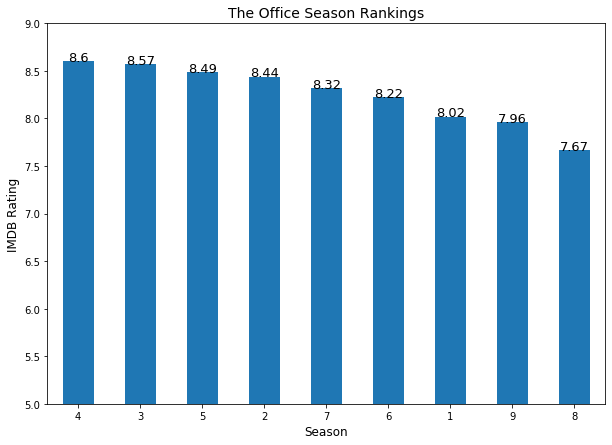

In [5]:
#Create bar chart of season rankings
ax = season_df.plot(kind="bar", figsize=(10,7), rot=0, legend=False, fontsize = 10)

# Create and format value labels
for col in season_df.columns:
    for id, val in enumerate(season_df['IMDB Rating']):
        ax.text(id, val, round(val,2), fontsize=13, ha='center', va='baseline', color = 'black')

# Format chart
plt.title("The Office Season Rankings", fontsize=14)
plt.xlabel("Season", fontsize=12)
plt.ylabel("IMDB Rating", fontsize=12)
plt.ylim(5.0, 9)

# Save image
plt.savefig("../images/season_rankings.png")

plt.show()

## Ranking by Episode

In [11]:
episode_all_df = pd.DataFrame(office_df).sort_values(by='IMDB Rating', ascending=False).round(2)
# top_episode_df = (episode_all_df[["Title", "IMDB Rating"]])

top_episode_df = (episode_all_df)
top_episode_df.head(15)

,Season,Episode,Title,IMDB Rating,Total Votes,Air Date
187,9,23,Finale,9.7,7934,16 May 2013
137,7,21,"Goodbye, Michael",9.7,5749,28 Apr 2011
77,5,13,Stress Relief,9.6,5948,1 Feb 2009
27,2,22,Casino Night,9.3,3644,11 May 2006
186,9,22,A.A.R.M.,9.3,2860,9 May 2013
132,7,16,Threat Level Midnight,9.3,3525,17 Feb 2011
95,6,5,Niagara: Part 2,9.3,1946,8 Oct 2009
64,4,14,"Goodbye, Toby",9.3,3010,15 May 2008
59,4,9,Dinner Party,9.3,4095,10 Apr 2008
50,3,23,The Job,9.3,3010,17 May 2007


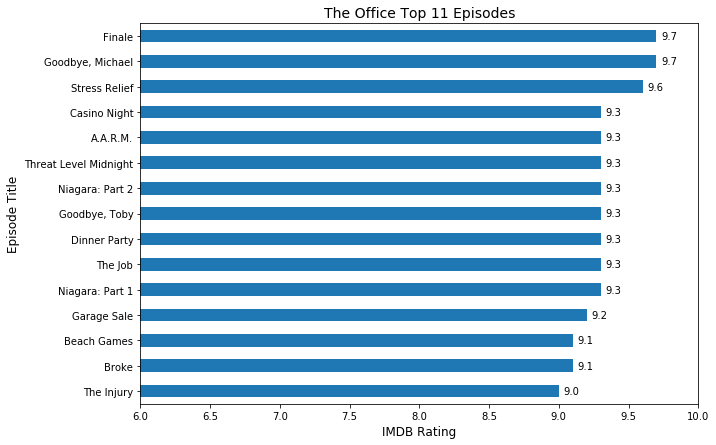

In [12]:
#Create bar chart of season rankings
ax = top_episode_df.iloc[0:15].plot.barh(x='Title', y='IMDB Rating', figsize=(10,7), rot=0, legend=False, fontsize = 10)


# Create and format value labels
# stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

rects = ax.patches

for rect in rects:
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    space = 5
    ha = 'left'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

    # Create annotation
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    
# Format chart
plt.title("The Office Top 11 Episodes", fontsize=14)
plt.xlabel("IMDB Rating", fontsize=12)
plt.ylabel("Episode Title", fontsize=12)
plt.xlim(6.0, 10)
ax.invert_yaxis()

# Save image
plt.savefig("../images/episode_rankings.png")

plt.show()

## Number of Episodes per Season